In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [24]:
df = pd.read_csv("penguins_size.csv")
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [25]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [26]:
print("Dataset Shape:", df.shape)
df.info()

Dataset Shape: (344, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [27]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

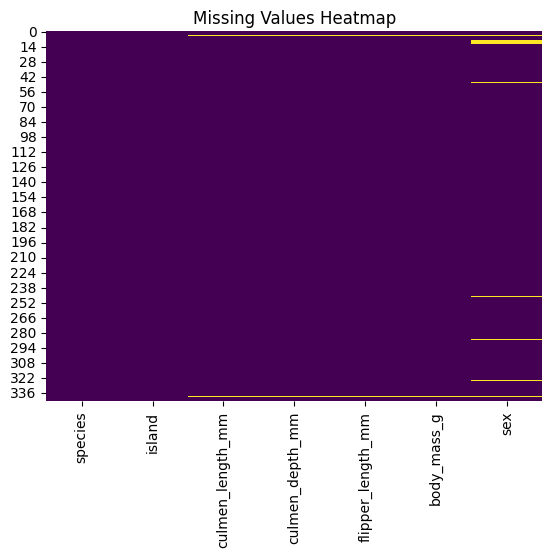

In [28]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

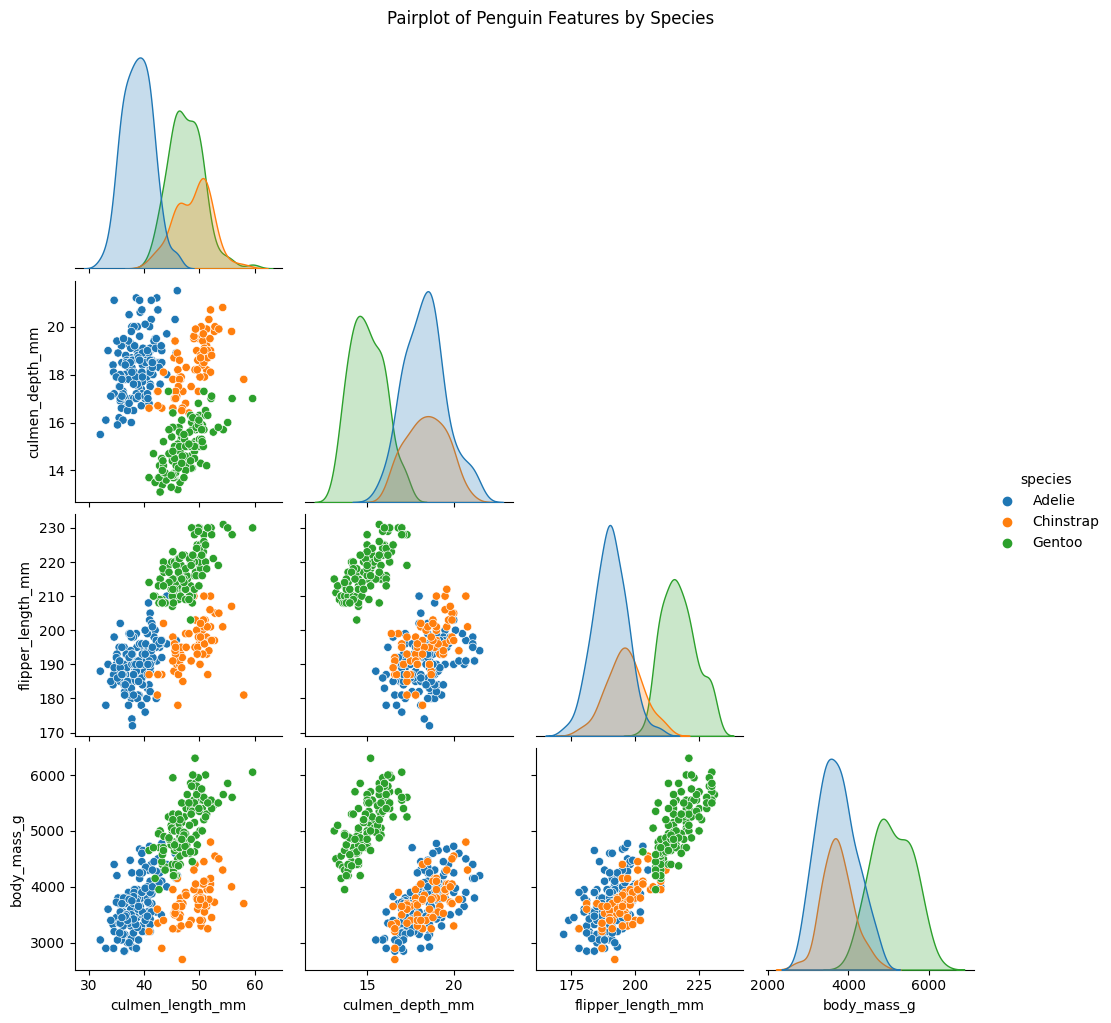

In [29]:
sns.pairplot(df.dropna(), hue='species', corner=True)
plt.suptitle('Pairplot of Penguin Features by Species', y=1.02)
plt.show()

In [30]:
df_cleaned = df.dropna().reset_index(drop=True)
df_cleaned.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [31]:
df_encoded = df_cleaned.copy()
cat_cols = ['island', 'sex']
le = LabelEncoder()
for col in cat_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [32]:
X = df_encoded.drop('species', axis=1)
y = df_encoded['species']
y = le.fit_transform(y)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [34]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
y_pred = model.predict(X_test)

In [36]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



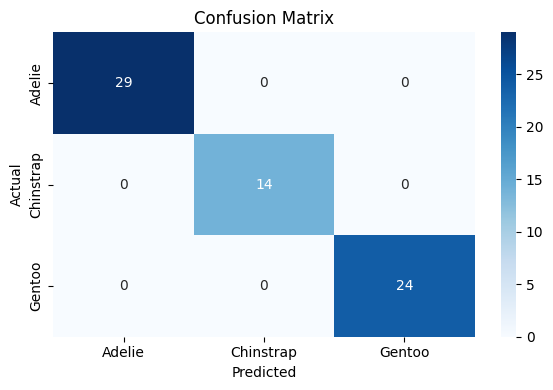

In [37]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, 
            yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

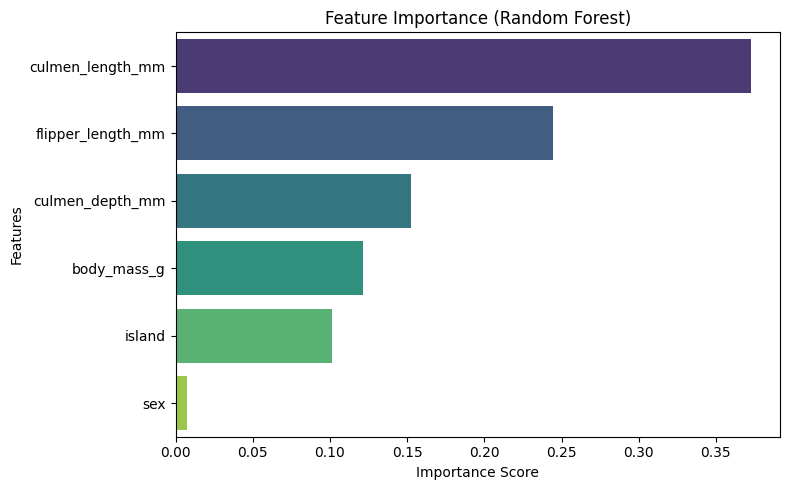

In [38]:
importances = model.feature_importances_
feature_names = X.columns
feat_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(data=feat_importance, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [39]:
def missing_values_table(df):
    #total missing values
    miss_val = df.isna().sum()
    
    #percentage of missing values
    miss_val_percentage = 100 * df.isna().sum()/len(df)
    
    #make the table for the results
    miss_val_table = pd.concat([miss_val, miss_val_percentage], axis = 1)

    #renaming the table columns
    missing_values_table = miss_val_table.rename(columns = {0:"Missing values", 1:"%Missing"})

    #sort values in the table
    sorted_data = missing_values_table.sort_values(by = 'Missing values', ascending = False)
    
    #print some summary information
    print("Your selected dataframe has " + str(df.shape) + "Columns" + str(df.columns))
    
    return sorted_data

In [40]:
missing = missing_values_table(df)
missing

Your selected dataframe has (344, 7)ColumnsIndex(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')


,Missing values,%Missing
sex,10,2.906977
culmen_length_mm,2,0.581395
culmen_depth_mm,2,0.581395
flipper_length_mm,2,0.581395
body_mass_g,2,0.581395
species,0,0.000000
island,0,0.000000


In [41]:
sorted_data = missing.sort_values(by = 'Missing values', ascending =  False)
sorted_data

,Missing values,%Missing
sex,10,2.906977
culmen_length_mm,2,0.581395
culmen_depth_mm,2,0.581395
flipper_length_mm,2,0.581395
body_mass_g,2,0.581395
species,0,0.000000
island,0,0.000000


In [42]:
df[df['culmen_length_mm'].isna()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [43]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [44]:
#number of species in dataset
df['species'].value_counts

<bound method IndexOpsMixin.value_counts of 0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 344, dtype: object>

sns.barplot(df.species.value_count.s)

<Axes: title={'center': 'species of penguins'}, xlabel='species'>

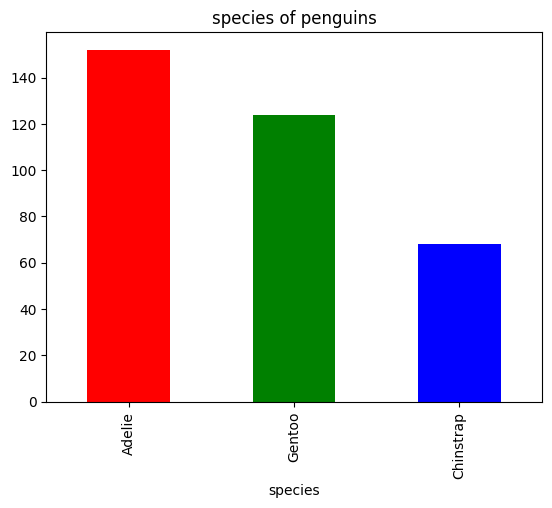

In [45]:
df.species.value_counts().plot(kind = 'bar', color = ['r', 'g', 'b'], title = 'species of penguins')

In [46]:
df.island.value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

<Axes: title={'center': 'Island'}, xlabel='island'>

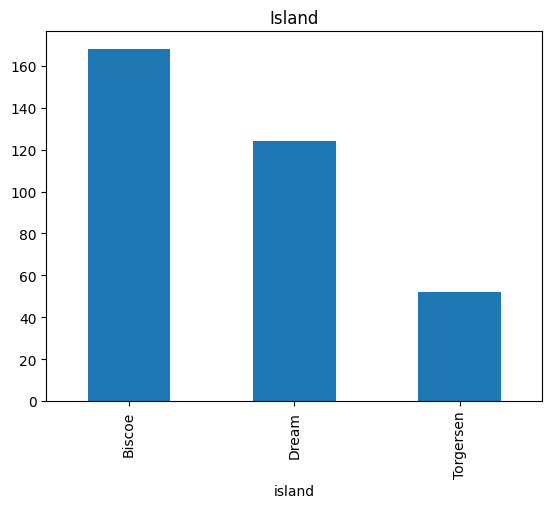

In [47]:
df.island.value_counts().plot(kind = 'bar', title = 'Island')

In [48]:
df.sex.value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

<Axes: title={'center': 'segrigation based on sex'}, ylabel='count'>

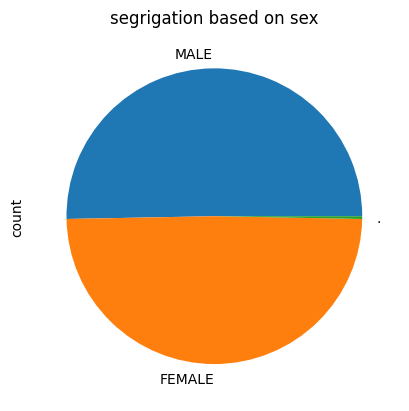

In [49]:
df.sex.value_counts().plot(kind = 'pie', title = 'segrigation based on sex')

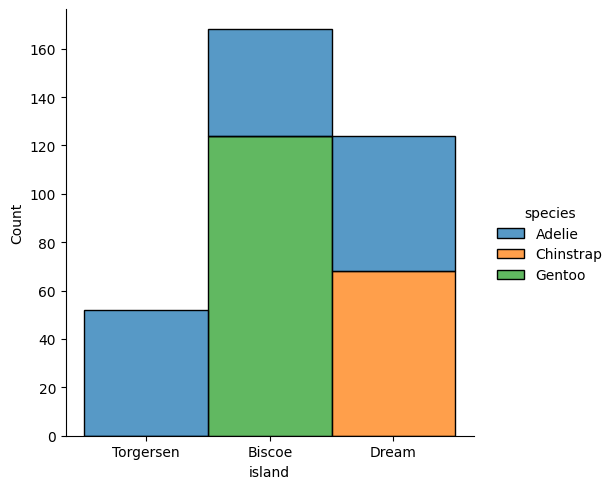

In [50]:
sns.displot(df, x = 'island', hue = 'species', multiple = 'stack')

<Axes: >

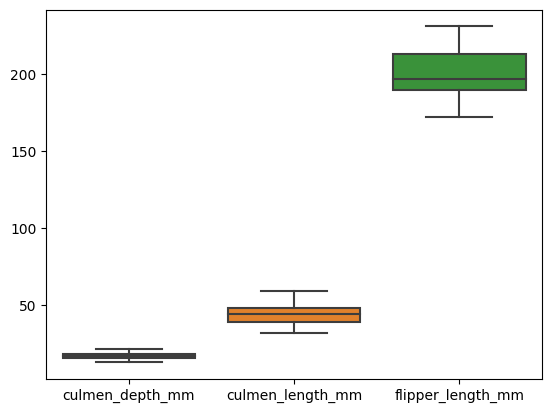

In [51]:
df1 = df[["culmen_depth_mm", "culmen_length_mm", "flipper_length_mm"]]
sns.boxplot(data=df1)

In [57]:
imputer = SimpleImputer(strategy='mean')
df2=imputer.fit_transform(df1)
df2

array([[ 18.7,  39.1, 181. ],
       [ 17.4,  39.5, 186. ],
       [ 18. ,  40.3, 195. ],
       ...,
       [ 15.7,  50.4, 222. ],
       [ 14.8,  45.2, 212. ],
       [ 16.1,  49.9, 213. ]])

In [58]:
lb = LabelEncoder()
df['sex']=lb.fit_transform(df['sex'])
df['sex']

0      2
1      1
2      1
3      3
4      1
      ..
339    3
340    1
341    2
342    1
343    2
Name: sex, Length: 344, dtype: int32

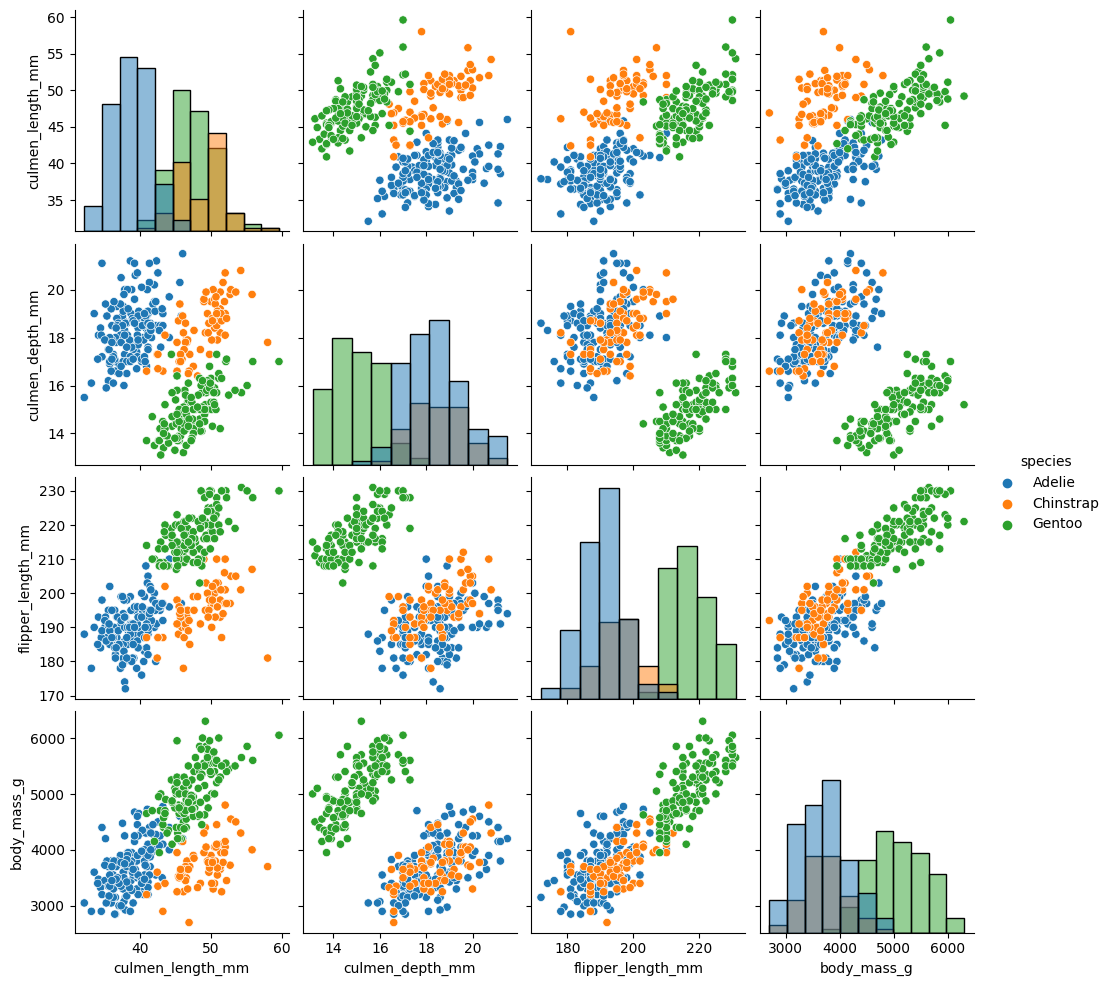

In [53]:
sns.pairplot(data=df, hue='species', diag_kind="hist")

In [54]:
penguin_data = df[["culmen_length_mm", 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
scaled_penguin_data = StandardScaler().fit_transform(penguin_data)
scaled_penguin_data

array([[-0.88449874,  0.78544923, -1.41834665, -0.56414208],
       [-0.81112573,  0.1261879 , -1.06225022, -0.50170305],
       [-0.66437972,  0.43046236, -0.42127665, -1.18853234],
       ...,
       [ 1.18828874, -0.73592307,  1.50164406,  1.93341896],
       [ 0.23443963, -1.19233476,  0.7894512 ,  1.24658968],
       [ 1.09657248, -0.53307343,  0.86067049,  1.49634578]])

In [59]:
list2 = [[11,2],[3,7]]
scaler = MinMaxScaler()
model = scaler.fit(list2)
scaled_data = model.transform(list2)
scaled_data

array([[1., 0.],
       [0., 1.]])

<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

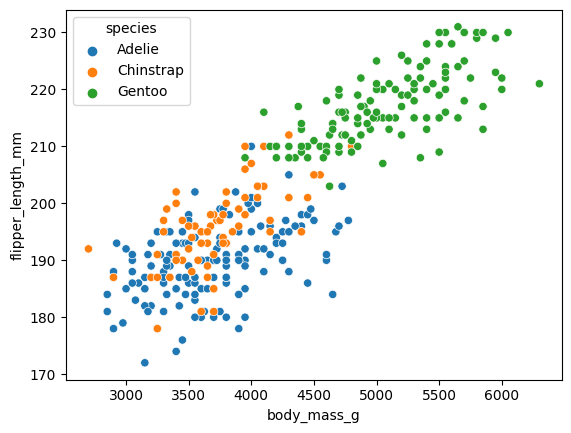

In [60]:
sns.scatterplot(data=df,x="body_mass_g",y='flipper_length_mm',hue='species')

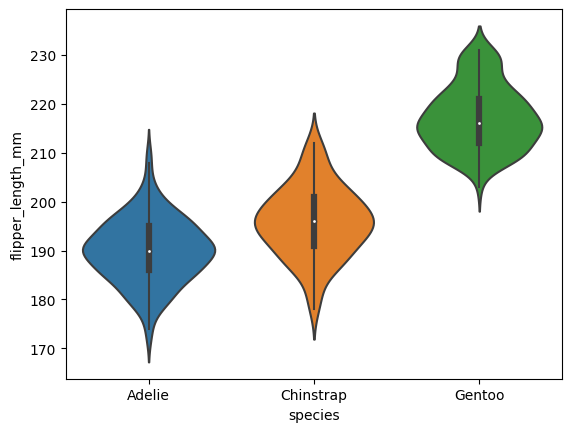

In [62]:
ax = sns.violinplot(x="species",y="flipper_length_mm",data=df)

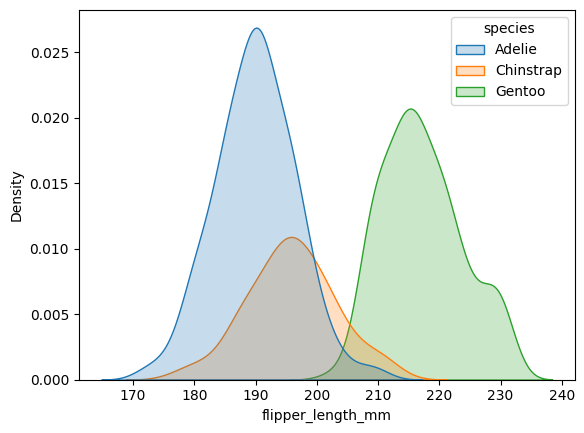

In [61]:
plot = sns.kdeplot(data=df,x="flipper_length_mm",shade=True,hue="species")